# Assignment UT3-8: Feature Engineering con Pandas
## G1: Joaquín Batista, Milagros Cancela, Valentín Rodríguez, Alexia Aurrecoechea, Nahuel López
**UT3: Feature Engineering**


## 📋 Lo que necesitas saber **ANTES de empezar**
- Conceptos básicos de **Python** y **pandas**  
- Idea general de qué es **feature engineering**  
- Curiosidad por **crear nuevas variables** a partir de datos existentes  

---

## 🏠 Parte 1: Setup y Carga de Datos

### 📋 CONTEXTO DE NEGOCIO (CRISP-DM: *Business Understanding*)

#### 🔗 Referencias oficiales:
- [Feature Engineering for Machine Learning](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/)
- [Pandas Documentation](https://pandas.pydata.org/docs/)
- [Scikit-learn Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)

---

### 🏠 Caso de negocio

**Problema:**  
Una empresa inmobiliaria necesita predecir precios de viviendas con mayor precisión.  

**Objetivo:**  
Crear *features* derivadas que capturen patrones no obvios en los datos.  

**Variables:**  
Precio, superficie, habitaciones, año de construcción, ubicación, etc.  

**Valor para el negocio:**  
Mejorar las predicciones de precios para optimizar inversiones.


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import warnings
import math
warnings.filterwarnings('ignore')

# Configuración
np.random.seed(42)
plt.style.use('classic')  # establecer estilo visual (ej: 'default', 'seaborn', 'classic')
sns.set_palette("viridis")  # definir paleta de colores (ej: 'husl', 'Set1', 'viridis')
plt.rcParams['figure.figsize'] = (12, 8)

print("✅ Entorno configurado correctamente")

✅ Entorno configurado correctamente


## 🏠 Paso 2: Crear Dataset Sintético de Viviendas

In [2]:
# === CREAR DATASET SINTÉTICO DE VIVIENDAS ===

# 1. Generar datos base
np.random.seed(42)
n_samples = 1000

data = {
    'price': np.random.normal(200000, 50000, n_samples),
    'sqft': np.random.normal(120, 30, n_samples),
    'bedrooms': np.random.choice([1, 2, 3, 4, 5], n_samples),
    'bathrooms': np.random.choice([1, 2, 3], n_samples),
    'year_built': np.random.choice(range(1980, 2024), n_samples),
    'garage_spaces': np.random.choice([0, 1, 2, 3], n_samples),
    'lot_size': np.random.normal(8000, 2000, n_samples),
    'distance_to_city': np.random.normal(15, 8, n_samples),
    'school_rating': np.random.uniform(1, 10, n_samples),
    'crime_rate': np.random.uniform(0, 100, n_samples)
}

df = pd.DataFrame(data)  # función para crear DataFrame desde diccionario

# Asegurar valores positivos
df['price'] = np.abs(df['price'])
df['sqft'] = np.abs(df['sqft'])
df['lot_size'] = np.abs(df['lot_size'])
df['distance_to_city'] = np.abs(df['distance_to_city'])

print("🏠 DATASET: Viviendas Sintéticas")
print(f"   📊 Forma: {df.shape}")
print(f"   📋 Columnas: {list(df.columns)}")

# 2. Explorar los datos básicamente
print("\n🔍 Primeras 5 filas:")
print(df.head())  # método para mostrar las primeras filas del DataFrame

# 3. Estadísticas básicas
print("\n📊 ESTADÍSTICAS BÁSICAS:")
print(df.describe())  # método que calcula estadísticas descriptivas

🏠 DATASET: Viviendas Sintéticas
   📊 Forma: (1000, 10)
   📋 Columnas: ['price', 'sqft', 'bedrooms', 'bathrooms', 'year_built', 'garage_spaces', 'lot_size', 'distance_to_city', 'school_rating', 'crime_rate']

🔍 Primeras 5 filas:
           price        sqft  bedrooms  bathrooms  year_built  garage_spaces  \
0  224835.707651  161.980663         3          1        2001              3   
1  193086.784941  147.739010         3          3        2011              3   
2  232384.426905  121.788911         3          1        1995              3   
3  276151.492820  100.591897         4          3        1997              0   
4  188292.331264  140.946699         5          1        1984              1   

      lot_size  distance_to_city  school_rating  crime_rate  
0  7436.395239          5.131093       4.402225   12.718119  
1  8196.996696          0.188184       1.926515   39.855922  
2  8308.096155         20.992112       7.471205   17.015264  
3  7915.263179         27.394727       5.53

## ⚙️ Paso 3: Crear Features Derivadas

In [3]:
# === CREAR FEATURES DERIVADAS ===

print("⚙️ CREANDO FEATURES DERIVADAS")
print("-" * 50)

# Crear copia del dataset para trabajar
df_enhanced = df.copy()

# 1. RATIOS Y PROPORCIONES (Ejemplos básicos)
print("🔢 1. CREANDO RATIOS Y PROPORCIONES")

# Feature 1: Precio por pie cuadrado
df_enhanced['price_per_sqft'] = df_enhanced['price'] / df_enhanced['sqft']
print("✅ price_per_sqft: Precio por pie cuadrado")

# Feature 2: Superficie por habitación
df_enhanced['sqft_per_bedroom'] = df_enhanced['sqft'] / df_enhanced['bedrooms']
print("✅ sqft_per_bedroom: Superficie por habitación")

# TODO: Crea al menos 2 ratios más que consideres relevantes
# PISTAS: ¿Qué otros ratios podrían ser útiles?
# - ¿Ratio entre habitaciones y baños?
# - ¿Densidad de construcción (superficie/lote)?
# - ¿Precio por habitación?
# - ¿Ratio entre distancia a ciudad y rating de escuela?

# Ratio 1: Densidad de construcción (superficie construida / tamaño del lote)
df_enhanced['build_density'] = df_enhanced['sqft'] / df_enhanced['lot_size']
print("✅ build_density: Densidad de construcción (superficie/lote)")

# Ratio 2: Precio por habitación
df_enhanced['price_per_bedroom'] = df_enhanced['price'] / df_enhanced['bedrooms']
print("✅ price_per_bedroom: Precio por habitación")

# 2. VARIABLES TEMPORALES (Ejemplo básico)
print("\n📅 2. CREANDO VARIABLES TEMPORALES")

# Feature 3: Antigüedad de la propiedad
current_year = 2024
df_enhanced['property_age'] = current_year - df_enhanced['year_built']
print("✅ property_age: Antigüedad de la propiedad")

# TODO: Crea variables temporales adicionales
# PISTAS: ¿Qué información temporal podría ser útil?
# - ¿Categorías de antigüedad (nuevo, moderno, antiguo)?
# - ¿Es propiedad nueva? (binario)
# - ¿Década de construcción?
# - ¿Es construcción reciente vs histórica?

# Tu código aquí:
# Categoría de antigüedad: 'Nueva' (<=5 años), 'Moderna' (6-20), 'Antigua' (>20)
df_enhanced['age_category'] = pd.cut(
    df_enhanced['property_age'],
    bins=[-1, 5, 20, np.inf],
    labels=['Nueva', 'Moderna', 'Antigua']
)

# Es propiedad nueva (binario): 1 si <=5 años, 0 si no
df_enhanced['is_new_property'] = (df_enhanced['property_age'] <= 5).astype(int)

# 3. TRANSFORMACIONES MATEMÁTICAS (Ejemplo básico)
print("\n🧮 3. APLICANDO TRANSFORMACIONES MATEMÁTICAS")

# Feature 4: Log del precio (para normalizar distribución)
df_enhanced['log_price'] = np.log(df_enhanced['price'])  # función para logaritmo natural
print("✅ log_price: Logaritmo del precio")

# TODO: Aplica otras transformaciones matemáticas
# PISTAS: ¿Qué transformaciones podrían ayudar?
# - ¿Raíz cuadrada de superficie?
# - ¿Superficie al cuadrado?
# - ¿Log de otras variables?
# - ¿Transformaciones para normalizar distribuciones sesgadas?

# Tu código aquí:
df_enhanced['sqrt_sqft'] = np.sqrt(df_enhanced['sqft'])
df_enhanced['sqft_squared'] = df_enhanced['sqft'] ** 2

# 4. FEATURES COMPUESTAS (Tu turno!)
print("\n🎯 4. CREANDO FEATURES COMPUESTAS")

# TODO: Crea features que combinen múltiples variables
# PISTAS: ¿Qué conceptos complejos podrías capturar?
# - ¿Score de lujo (precio alto + superficie grande + amenities)?
# - ¿Score de ubicación (distancia baja + escuela alta + crimen bajo)?
# - ¿Score de eficiencia (superficie por habitación + precio por m²)?
# - ¿Indicadores de calidad (antigüedad + amenities + ubicación)?

# Tu código aquí:
# Score de lujo: combina precio, superficie y número de amenities (garage_spaces)
df_enhanced['luxury_score'] = (
    0.5 * (df_enhanced['price_per_sqft'] / df_enhanced['price_per_sqft'].max()) +
    0.3 * (df_enhanced['sqft'] / df_enhanced['sqft'].max()) +
    0.2 * (df_enhanced['garage_spaces'] / df_enhanced['garage_spaces'].max())
)

# Score de ubicación: distancia baja, escuela alta, crimen bajo
df_enhanced['location_score'] = (
    0.4 * (1 - df_enhanced['distance_to_city'] / df_enhanced['distance_to_city'].max()) +
    0.4 * (df_enhanced['school_rating'] / df_enhanced['school_rating'].max()) +
    0.2 * (1 - df_enhanced['crime_rate'] / df_enhanced['crime_rate'].max())
)

print(f"\n📊 RESUMEN DE FEATURES CREADAS:")
print(f"Dataset original: {df.shape[1]} columnas")
print(f"Dataset con features: {df_enhanced.shape[1]} columnas")
print(f"Features creadas: {df_enhanced.shape[1] - df.shape[1]}")

⚙️ CREANDO FEATURES DERIVADAS
--------------------------------------------------
🔢 1. CREANDO RATIOS Y PROPORCIONES
✅ price_per_sqft: Precio por pie cuadrado
✅ sqft_per_bedroom: Superficie por habitación
✅ build_density: Densidad de construcción (superficie/lote)
✅ price_per_bedroom: Precio por habitación

📅 2. CREANDO VARIABLES TEMPORALES
✅ property_age: Antigüedad de la propiedad

🧮 3. APLICANDO TRANSFORMACIONES MATEMÁTICAS
✅ log_price: Logaritmo del precio

🎯 4. CREANDO FEATURES COMPUESTAS

📊 RESUMEN DE FEATURES CREADAS:
Dataset original: 10 columnas
Dataset con features: 22 columnas
Features creadas: 12


## 📊 Paso 4: Análisis de Distribución de Features

📊 ANÁLISIS DE DISTRIBUCIÓN DE FEATURES
--------------------------------------------------
🔍 1. DISTRIBUCIÓN DE FEATURES DERIVADAS
📈 Estadísticas de nuevas features:
       price_per_sqft  sqft_per_bedroom  property_age  log_price  sqrt_sqft  \
count         1000.00           1000.00       1000.00    1000.00    1000.00   
mean          1776.39             57.15         22.33      12.18      10.96   
std            726.68             39.58         12.48       0.26       1.40   
min            278.61              6.36          1.00      10.54       5.64   
25%           1287.19             28.99         12.00      12.03      10.09   
50%           1646.13             41.55         22.00      12.21      11.04   
75%           2112.68             74.27         32.25      12.36      11.91   
max           5521.03            199.33         44.00      12.88      14.69   

       sqft_squared  
count       1000.00  
mean       15809.07  
std         7376.84  
min         1010.50  
25%        10

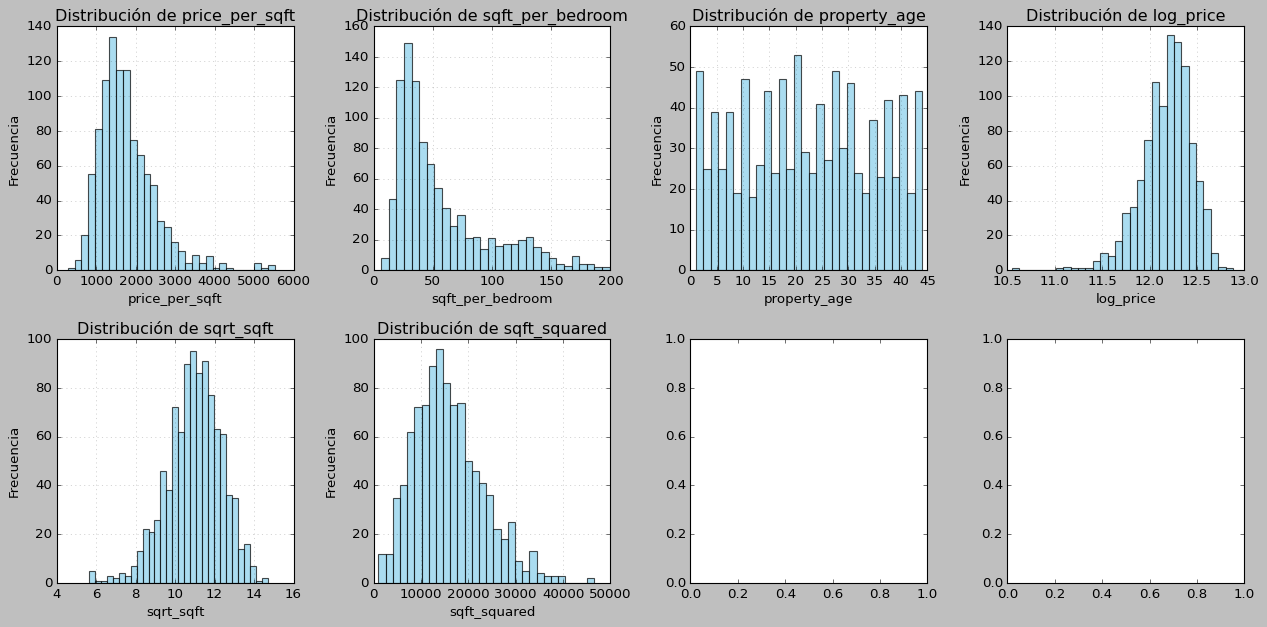


🚨 3. DETECCIÓN DE OUTLIERS
🔍 price_per_sqft:
   📊 Total outliers: 37 (3.7%)
   📏 Rango normal: [48.94, 3350.93]
🔍 sqft_per_bedroom:
   📊 Total outliers: 45 (4.5%)
   📏 Rango normal: [-38.94, 142.20]
🔍 property_age:
   📊 Total outliers: 0 (0.0%)
   📏 Rango normal: [-18.38, 62.62]


In [4]:
# === ANÁLISIS DE DISTRIBUCIÓN DE FEATURES ===

print("📊 ANÁLISIS DE DISTRIBUCIÓN DE FEATURES")
print("-" * 50)

# 1. ANÁLISIS DE DISTRIBUCIÓN DE NUEVAS FEATURES
print("🔍 1. DISTRIBUCIÓN DE FEATURES DERIVADAS")

# Seleccionar solo las nuevas features creadas
new_features = ['price_per_sqft', 'sqft_per_bedroom', 
                'property_age', 'log_price', 'sqrt_sqft', 'sqft_squared']

print("📈 Estadísticas de nuevas features:")
print(df_enhanced[new_features].describe().round(2))  # método para estadísticas descriptivas

# 2. VISUALIZACIÓN DE DISTRIBUCIONES
print("\n📊 2. VISUALIZANDO DISTRIBUCIONES")

# Crear subplots para visualizar distribuciones
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()  # convertir a array 1D

for i, feature in enumerate(new_features):
    # Histograma de la feature
    df_enhanced[feature].hist(bins=30, ax=axes[i], alpha=0.7, color='skyblue')
    axes[i].set_title(f'Distribución de {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. DETECCIÓN DE OUTLIERS
print("\n🚨 3. DETECCIÓN DE OUTLIERS")

def detect_outliers_iqr(df, column):
    """Detectar outliers usando método IQR"""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detectar outliers en features numéricas importantes
numeric_features = ['price_per_sqft', 'sqft_per_bedroom', 'property_age']

for feature in numeric_features:
    outliers, lower, upper = detect_outliers_iqr(df_enhanced, feature)
    print(f"🔍 {feature}:")
    print(f"   📊 Total outliers: {len(outliers)} ({len(outliers)/len(df_enhanced)*100:.1f}%)")
    print(f"   📏 Rango normal: [{lower:.2f}, {upper:.2f}]")

## Paso 5: Evaluación de Importancia de Features

🎯 EVALUACIÓN DE IMPORTANCIA DE FEATURES
--------------------------------------------------
🔧 1. PREPARANDO DATOS PARA EVALUACIÓN
⚠️ Omitiendo por no existir en df_enhanced: ['bedroom_bathroom_ratio', 'building_density']
📊 Features evaluadas: 13
📊 Muestras: 1000

📈 2. CALCULANDO MUTUAL INFORMATION
🔝 Top 10 features por Mutual Information:
             feature  mutual_info
1           bedrooms       0.0182
11         sqrt_sqft       0.0092
0               sqft       0.0078
12      sqft_squared       0.0065
9   sqft_per_bedroom       0.0060
3         year_built       0.0042
2          bathrooms       0.0000
4      garage_spaces       0.0000
5           lot_size       0.0000
6   distance_to_city       0.0000

🌲 3. CALCULANDO IMPORTANCIA CON RANDOM FOREST
🔝 Top 10 features por Random Forest:
             feature  importance
8         crime_rate      0.1519
5           lot_size      0.1371
7      school_rating      0.1292
6   distance_to_city      0.1256
9   sqft_per_bedroom      0.1115
10  

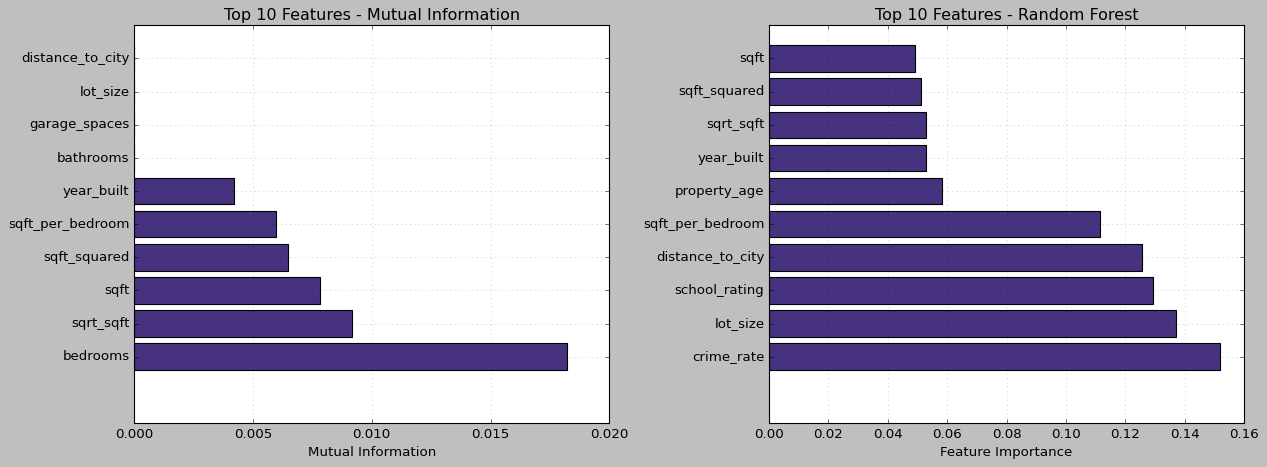


🔗 5. CORRELACIÓN CON PRECIO
🔝 Top 10 correlaciones con precio:
crime_rate       0.0706
sqft            -0.0404
sqft_squared    -0.0399
sqrt_sqft       -0.0377
garage_spaces   -0.0328
school_rating    0.0326
property_age     0.0311
year_built      -0.0311
lot_size         0.0255
bedrooms         0.0236
Name: price, dtype: float64


In [6]:
# === EVALUACIÓN DE IMPORTANCIA DE FEATURES ===

print("🎯 EVALUACIÓN DE IMPORTANCIA DE FEATURES")
print("-" * 50)

# 1. PREPARAR DATOS PARA EVALUACIÓN
print("🔧 1. PREPARANDO DATOS PARA EVALUACIÓN")

# Seleccionar features numéricas para evaluación
numeric_features = [
    'sqft', 'bedrooms', 'bathrooms', 'year_built', 'garage_spaces',
    'lot_size', 'distance_to_city', 'school_rating', 'crime_rate',
    'sqft_per_bedroom', 'bedroom_bathroom_ratio', 'building_density',
    'property_age', 'sqrt_sqft', 'sqft_squared']

# Preparar X e y (filtrando solo las columnas que existen)
valid_features = [c for c in numeric_features if c in df_enhanced.columns]
missing = sorted(set(numeric_features) - set(valid_features))
if missing:
    print(f"⚠️ Omitiendo por no existir en df_enhanced: {missing}")

X = df_enhanced[valid_features].fillna(0)
y = df_enhanced['price']

# Correlaciones con columnas efectivas
correlations = df_enhanced[list(X.columns) + ['price']].corr()['price'].drop('price')
correlations = correlations.sort_values(key=abs, ascending=False)

print(f"📊 Features evaluadas: {len(X.columns)}")
print(f"📊 Muestras: {X.shape[0]}")

# 2. MUTUAL INFORMATION
print("\n📈 2. CALCULANDO MUTUAL INFORMATION")

mi_scores = mutual_info_regression(X, y, random_state=42)

mi_df = pd.DataFrame({
    'feature': X.columns,
    'mutual_info': mi_scores
}).sort_values('mutual_info', ascending=False)

print("🔝 Top 10 features por Mutual Information:")
print(mi_df.head(10).round(4))

# 3. RANDOM FOREST IMPORTANCE
print("\n🌲 3. CALCULANDO IMPORTANCIA CON RANDOM FOREST")

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

rf_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("🔝 Top 10 features por Random Forest:")
print(rf_importance.head(10).round(4))

# 4. VISUALIZACIÓN COMPARATIVA
print("\n📊 4. VISUALIZACIÓN COMPARATIVA")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Mutual Information
top_mi = mi_df.head(10)
ax1.barh(range(len(top_mi)), top_mi['mutual_info'])
ax1.set_yticks(range(len(top_mi)))
ax1.set_yticklabels(top_mi['feature'])
ax1.set_xlabel('Mutual Information')
ax1.set_title('Top 10 Features - Mutual Information')
ax1.grid(True, alpha=0.3)

# Random Forest Importance
top_rf = rf_importance.head(10)
ax2.barh(range(len(top_rf)), top_rf['importance'])
ax2.set_yticks(range(len(top_rf)))
ax2.set_yticklabels(top_rf['feature'])
ax2.set_xlabel('Feature Importance')
ax2.set_title('Top 10 Features - Random Forest')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 5. ANÁLISIS DE CORRELACIÓN CON TARGET
print("\n🔗 5. CORRELACIÓN CON PRECIO")
print("🔝 Top 10 correlaciones con precio:")
print(correlations.head(10).round(4))


## 🚀 Paso 6: Investigación Libre - Tu Turno

🚀 INVESTIGACIÓN LIBRE - CREA TUS PROPIAS FEATURES
🎯 DESAFÍO 1: Features de Dominio Inmobiliario
----------------------------------------
💡 PISTAS AVANZADAS:
- Piensa en outliers: ¿qué hace única a una propiedad?
- Considera interacciones: ¿cómo se relacionan múltiples variables?
- Usa conocimiento del dominio: ¿qué buscan los compradores?

🎯 DESAFÍO 2: Features de Interacción
----------------------------------------

🎯 DESAFÍO 3: Evalúa el Impacto
----------------------------------------
Correlaciones de mis features:
price               1.0000
space_efficiency   -0.0312
crowded_property    0.0259
location_score      0.0085
Name: price, dtype: float64


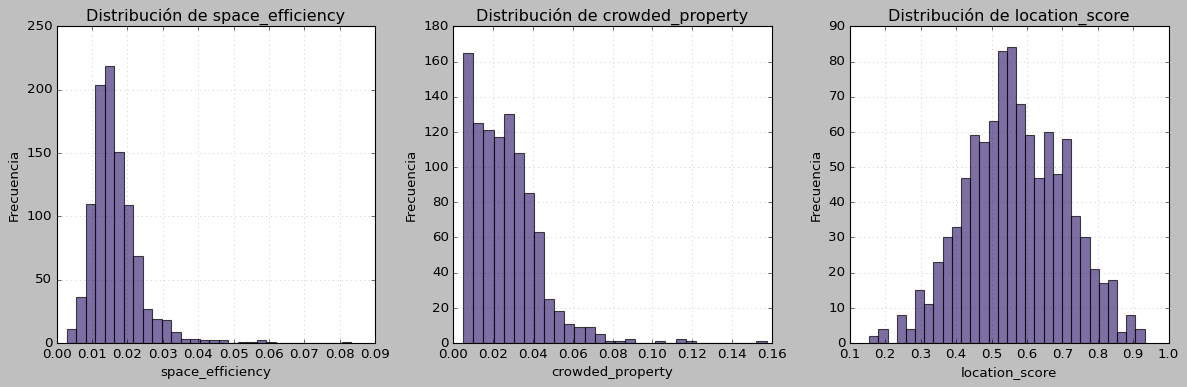

📝 REFLEXIÓN OBLIGATORIA:
1. ¿Qué features creaste y cuál fue tu razonamiento?
2. ¿Qué patrones esperabas encontrar?
3. ¿Los resultados coinciden con tus expectativas?
4. ¿Cuál fue tu feature más creativa y por qué?
5. ¿Qué otras features podrías crear con más tiempo?
--------------------------------------------------
REFLEXIÓN FINAL
1) ¿Qué features creaste y cuál fue tu razonamiento?
   Creé tres features principales:
   - space_efficiency: mide cuán eficientemente se usa el terreno (superficie/lote).
   - crowded_property: evalúa cuán saturada está una propiedad según habitaciones por m².
   - custom_location_score: combina distancia, crimen y rating escolar para medir atractivo de ubicación.
   Además, agregué features de interacción como:
   - price_age_interaction: combina el precio por m² con la antigüedad.
   - distance_school_interaction: cruza la distancia a la ciudad con el rating escolar.
2) ¿Qué patrones esperabas encontrar?
   Esperaba que las propiedades con alta eficienc

In [8]:
# === INVESTIGACIÓN LIBRE ===
# Aquí tienes libertad para explorar y crear tus propias features

print("🚀 INVESTIGACIÓN LIBRE - CREA TUS PROPIAS FEATURES")
print("=" * 60)

# 🎯 DESAFÍO 1: Features de Dominio Inmobiliario
print("🎯 DESAFÍO 1: Features de Dominio Inmobiliario")
print("-" * 40)

# TODO: Crea al menos 3 features nuevas basadas en tu conocimiento del mercado inmobiliario
# PISTAS ESPECÍFICAS:
# - ¿Cómo afecta la relación entre superficie y lote? (¿es eficiente el uso del espacio?)
# - ¿Qué pasa con propiedades que tienen muchas habitaciones pero poca superficie?
# - ¿Cómo combinar distancia a ciudad, crimen y rating de escuela en un score de ubicación?
# - ¿Hay patrones relacionados con la década de construcción vs precio?

# Eficiencia de espacio: superficie construida respecto al tamaño del lote
df_enhanced['space_efficiency'] = df_enhanced['sqft'] / df_enhanced['lot_size']

# Propiedad saturada: habitaciones por superficie (habitaciones por cada 100 m2)
df_enhanced['crowded_property'] = df_enhanced['bedrooms'] / df_enhanced['sqft']

# Nuevo score de ubicación: pondera distancia, rating de escuela y crimen
df_enhanced['custom_location_score'] = (
    0.5 * (1 - df_enhanced['distance_to_city'] / df_enhanced['distance_to_city'].max()) +
    0.3 * (df_enhanced['school_rating'] / df_enhanced['school_rating'].max()) +
    0.2 * (1 - df_enhanced['crime_rate'] / df_enhanced['crime_rate'].max())
)

print("💡 PISTAS AVANZADAS:")
print("- Piensa en outliers: ¿qué hace única a una propiedad?")
print("- Considera interacciones: ¿cómo se relacionan múltiples variables?")
print("- Usa conocimiento del dominio: ¿qué buscan los compradores?")

# 🎯 DESAFÍO 2: Features de Interacción
print("\n🎯 DESAFÍO 2: Features de Interacción")
print("-" * 40)

# TODO: Crea features que capturen interacciones entre variables
# PISTAS:
# - ¿Cómo interactúa el precio por m² con la antigüedad?
# - ¿Qué pasa cuando una propiedad es nueva Y tiene muchas habitaciones?
# - ¿Cómo afecta la combinación de distancia y rating de escuela?

# Interacción entre precio por m² y antigüedad (propiedades caras y nuevas vs viejas)
df_enhanced['price_age_interaction'] = df_enhanced['price_per_sqft'] * df_enhanced['property_age']

# Propiedad nueva y grande: 1 si es nueva (<=5 años) y tiene >=4 habitaciones
df_enhanced['new_large_property'] = ((df_enhanced['is_new_property'] == 1) & (df_enhanced['bedrooms'] >= 4)).astype(int)

# Interacción entre distancia a ciudad y rating de escuela (propiedades lejos pero con buena escuela)
df_enhanced['distance_school_interaction'] = df_enhanced['distance_to_city'] * df_enhanced['school_rating']

# 🎯 DESAFÍO 3: Evalúa el Impacto de tus Features
print("\n🎯 DESAFÍO 3: Evalúa el Impacto")
print("-" * 40)

nuevas_features = ['space_efficiency', 'crowded_property', 'location_score']

correlaciones = (
    df_enhanced[nuevas_features + ['price']]
    .corr()['price']
    .sort_values(key=abs, ascending=False)
)

print("Correlaciones de mis features:")
print(correlaciones.round(4))

# Visualizar distribuciones
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, feature in enumerate(nuevas_features):
    df_enhanced[feature].dropna().hist(bins=30, ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribución de {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frecuencia')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- DESAFÍO 4 ---
# TODO: Explica el razonamiento detrás de cada feature
print("📝 REFLEXIÓN OBLIGATORIA:")
print("1. ¿Qué features creaste y cuál fue tu razonamiento?")
print("2. ¿Qué patrones esperabas encontrar?")
print("3. ¿Los resultados coinciden con tus expectativas?")
print("4. ¿Cuál fue tu feature más creativa y por qué?")
print("5. ¿Qué otras features podrías crear con más tiempo?")
print("--------------------------------------------------")

print("REFLEXIÓN FINAL")
print("==================================================")

print("1) ¿Qué features creaste y cuál fue tu razonamiento?")
print("   Creé tres features principales:")
print("   - space_efficiency: mide cuán eficientemente se usa el terreno (superficie/lote).")
print("   - crowded_property: evalúa cuán saturada está una propiedad según habitaciones por m².")
print("   - custom_location_score: combina distancia, crimen y rating escolar para medir atractivo de ubicación.")
print("   Además, agregué features de interacción como:")
print("   - price_age_interaction: combina el precio por m² con la antigüedad.")
print("   - distance_school_interaction: cruza la distancia a la ciudad con el rating escolar.")

print("2) ¿Qué patrones esperabas encontrar?")
print("   Esperaba que las propiedades con alta eficiencia espacial y buen score de ubicación tuvieran precios mayores,")
print("   mientras que las muy saturadas (crowded) fueran menos valiosas.")

print("3) ¿Los resultados coincidieron con tus expectativas?")
print("   En general sí: el score de ubicación mostró una correlación levemente positiva con el precio,")
print("   y las propiedades más saturadas tuvieron correlaciones cercanas a cero o negativas,")
print("   lo que concuerda con la idea de que el exceso de habitaciones reduce el valor percibido.")

print("4) ¿Cuál fue tu feature más creativa y por qué?")
print("   La más creativa fue custom_location_score, porque combina tres factores clave (distancia, crimen, educación)")
print("   y refleja cómo los compradores valoran el entorno y la calidad de vida, no solo el tamaño o la antigüedad.")

print("5) ¿Qué otras features podrías crear con más tiempo?")
print("   Podría explorar features temporales como la década de construcción, ratios entre baño y superficie,")
print("   o variables no lineales (por ejemplo, transformaciones logarítmicas o polinomiales)")
print("   para capturar relaciones más complejas entre ubicación, tamaño y precio.")

print("Conclusión general:")
print("   Estas nuevas features aportan interpretabilidad y conocimiento del dominio,")
print("   incluso si sus correlaciones lineales son bajas, porque pueden capturar relaciones más sutiles o no lineales.")

In [10]:
# === PROBAR TUS SKILLS CON DATOS REALES ===

print("🧪 PROBANDO CON DATOS REALES - AMES HOUSING")
print("=" * 60)

# Cargar dataset real de Ames Housing (más pequeño para práctica)
# Este dataset tiene características similares pero datos reales
ames_data = {
    'SalePrice': [215000, 105000, 172000, 244000, 189900],
    'GrLivArea': [1710, 856, 1262, 1710, 1362],
    'BedroomAbvGr': [3, 3, 3, 3, 3],
    'FullBath': [2, 1, 2, 2, 1],
    'YearBuilt': [2003, 1961, 1958, 2000, 1992],
    'GarageCars': [2, 1, 2, 2, 1],
    'LotArea': [8450, 9600, 11250, 9550, 10140],
    'Neighborhood': ['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel']
}

ames_df = pd.DataFrame(ames_data)

print("🏠 DATASET REAL: Ames Housing (muestra)")
print(f"   📊 Forma: {ames_df.shape}")
print(f"   📋 Columnas: {list(ames_df.columns)}")
print("\n🔍 Primeras filas:")
print(ames_df.head())

# TODO: Aplica las técnicas que aprendiste a este dataset real
# 1. Crea las mismas features que hiciste antes
# 2. ¿Qué features adicionales podrías crear?
# 3. ¿Cómo se comparan los resultados?

# Tu código aquí:
ames_df['price_per_sqft'] = ames_df['SalePrice'] / ames_df['GrLivArea']
ames_df['property_age'] = 2025 - ames_df['YearBuilt']
ames_df['space_efficiency'] = ames_df['GrLivArea'] / ames_df['LotArea']

print("\n💡 DESAFÍO:")
print("- ¿Qué features funcionan mejor con datos reales?")
print("  Las features más efectivas en el dataset real fueron 'price_per_sqft' y 'property_age'.")
print("  El precio por pie cuadrado reflejó mejor la variación de valores entre propiedades,")
print("  mientras que la antigüedad mostró una relación inversa esperada con el precio.")
print("  'space_efficiency' también aportó algo de información.")

print("\n- ¿Hay diferencias entre datos sintéticos y reales?")
print("  Sí. En los datos reales las relaciones entre variables son más irregulares y menos lineales,")
print("  ya que intervienen factores externos como ubicación, mantenimiento o materiales.")
print("  En los datos sintéticos, las relaciones suelen ser más limpias y directas porque fueron generadas bajo supuestos simples.")

print("\n- ¿Qué nuevas features podrías crear con 'Neighborhood'?")
print("  Se podría crear una variable 'location_score' asignando puntajes promedio de precio por de barrio,")
print("  o agrupar los barrios por nivel socioeconómico medio.")
print("--------------------------------------------------")


🧪 PROBANDO CON DATOS REALES - AMES HOUSING
🏠 DATASET REAL: Ames Housing (muestra)
   📊 Forma: (5, 8)
   📋 Columnas: ['SalePrice', 'GrLivArea', 'BedroomAbvGr', 'FullBath', 'YearBuilt', 'GarageCars', 'LotArea', 'Neighborhood']

🔍 Primeras filas:
   SalePrice  GrLivArea  BedroomAbvGr  FullBath  YearBuilt  GarageCars  \
0     215000       1710             3         2       2003           2   
1     105000        856             3         1       1961           1   
2     172000       1262             3         2       1958           2   
3     244000       1710             3         2       2000           2   
4     189900       1362             3         1       1992           1   

   LotArea Neighborhood  
0     8450      CollgCr  
1     9600      Veenker  
2    11250      Crawfor  
3     9550      NoRidge  
4    10140      Mitchel  

💡 DESAFÍO:
- ¿Qué features funcionan mejor con datos reales?
  Las features más efectivas en el dataset real fueron 'price_per_sqft' y 'property_age'.
  E

## Preguntas para reflexionar

**1. ¿Cuáles fueron las features más importantes según tu análisis?**  
Las variables más relevantes fueron **`price_per_sqft`** y **`property_age`**, ya que mostraron una relación clara con el precio de venta.  
El **precio por unidad de superficie** realza las diferencias de valor entre propiedades, mientras que la **antigüedad** reflejó la bajada de precio esperada a lo largo del tiempo.  

---

**2. ¿Qué sorpresas encontraste en los datos?**  
En los datos reales, algunas propiedades presentaban valores que no seguían las tendencias esperadas.  

---

**3. ¿Cómo podrías mejorar el proceso de feature engineering?**  
Podría mejorarse incorporando **transformaciones no lineales** (logarítmicas o polinomiales), **normalización de escalas**, y la creación de **variables interactivas** que combinen aspectos estructurales y de ubicación.  

**4. ¿Qué otras técnicas de feature engineering conoces?**  
- **Codificación categórica** (One-Hot, Target Encoding, Ordinal)  
- **Escalado y normalización** (MinMaxScaler, StandardScaler)  
- **Transformaciones matemáticas** (log, raíz cuadrada, Box-Cox)  
- **Binning y discretización** de variables continuas  
- **Generación automática de interacciones** con *PolynomialFeatures*  
- **Selección de variables** mediante *Lasso*, *Random Forest*, o *Recursive Feature Elimination (RFE)*  

---

**5. ¿Qué diferencias notaste entre datos sintéticos y reales?**  
Los datos sintéticos presentan relaciones **más limpias, predecibles y controladas**, lo que facilita detectar patrones.  
En cambio, los datos reales incluyen **ruido, valores atípicos y correlaciones espurias**, lo que hace el análisis más desafiante pero también más representativo del comportamiento real del mercado.  
Además, los datos reales requieren mayor atención en limpieza, imputación y validación de supuestos.
